<a href="https://colab.research.google.com/github/KeneKing12/Kenechukwu/blob/main/Lab4_kenechukwu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
# Import necessary libraries
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Get MNIST Dataset

In [ ]:
# Load MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

# Convert target to integers (it may come as string)
y = y.astype(np.uint8)

In [ ]:
y.shape

(70000,)

In [ ]:
X.shape

(70000, 784)

# Split Data

In [ ]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14, random_state=42)

# KNN Classifier

In [ ]:
knn_clf = KNeighborsClassifier()

# Train a KNN Classifier on the MNIST Dataset
knn_clf.fit(X_train, y_train)

# Predict output
y_knn_pred = knn_clf.predict(X_test)

print('Accuracy_score with default hyperparameters: n_neighbors= 5, weights= uniform:')
accuracy_score(y_test, y_knn_pred)

Accuracy_score with default hyperparameters: n_neighbors= 5, weights= uniform:


0.9692888480767269

# KNN Classifier Hyperparameters Fine-Tuning

In [ ]:
# Perform a grid search to find the best hyperparameters
param_grid = {
    'n_neighbors': [3, 4, 5],
    'weights': ['uniform', 'distance']
}

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

print("\n Best parameters found by grid search:", grid_search.best_params_)
print("\n Best cross-validation accuracy:", grid_search.best_score_)

print('\n Best knn_clf =', grid_search.best_estimator_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits

 Best parameters found by grid search: {'n_neighbors': 4, 'weights': 'distance'}

 Best cross-validation accuracy: 0.9727237847427753

 Best knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')


# Model Performance on the test set


In [ ]:
# Train the classifier with the best parameters
best_knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
best_knn_clf.fit(X_train, y_train)

# Evaluate the classifier accuracy on the test set
y_test_pred = best_knn_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))

Test set accuracy: 0.9730639730639731
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       967
           1       0.96      1.00      0.98      1129
           2       0.98      0.97      0.97       950
           3       0.97      0.97      0.97      1018
           4       0.98      0.96      0.97       885
           5       0.97      0.97      0.97       914
           6       0.98      0.99      0.98       946
           7       0.96      0.97      0.97      1031
           8       0.99      0.94      0.96       950
           9       0.96      0.96      0.96      1011

    accuracy                           0.97      9801
   macro avg       0.97      0.97      0.97      9801
weighted avg       0.97      0.97      0.97      9801



Error Analysis

In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_test_pred))

,0,1,2,3,4,5,6,7,8,9
0,952,0,4,0,1,0,2,1,7,0
1,0,1115,3,6,1,0,0,1,2,1
2,1,2,926,2,4,0,4,3,7,1
3,1,0,17,970,0,6,1,10,7,6
4,1,0,2,0,857,0,4,2,2,17
5,1,1,2,15,3,876,5,0,9,2
6,4,1,0,0,3,7,930,0,1,0
7,1,3,11,0,5,0,0,1003,1,7
8,0,4,6,11,4,4,2,5,907,7
9,5,5,1,12,13,2,1,9,7,956


# Compare the accuracy of your KNN classifier with other classifiers


# Random Forest Classifier



In [ ]:
# Define the parameter grid for fine-tuning Random Forest hyperparameters
param_grid = {
    # Number of trees in the forest
    'n_estimators': [400, 500],
    # The number of features to consider when looking for the best split
    'max_depth': [30, None],  # Maximum depth of the trees
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("\n Best parameters found by grid search:", grid_search.best_params_)
print("\n Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



 Best parameters found by grid search: {'max_depth': None, 'n_estimators': 500}

 Best cross-validation accuracy: 0.9695343635399791


In [ ]:
# Train the classifier with the best parameters
best_model = RandomForestClassifier(max_depth=None, n_estimators= 500)
best_model.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\n Test set accuracy:", test_accuracy)
# classification_report
print(classification_report(y_test, y_test_pred))



 Test set accuracy: 0.9684726048362412
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       967
           1       0.99      0.99      0.99      1129
           2       0.95      0.97      0.96       950
           3       0.95      0.95      0.95      1018
           4       0.96      0.97      0.97       885
           5       0.98      0.96      0.97       914
           6       0.98      0.98      0.98       946
           7       0.97      0.97      0.97      1031
           8       0.95      0.95      0.95       950
           9       0.96      0.95      0.95      1011

    accuracy                           0.97      9801
   macro avg       0.97      0.97      0.97      9801
weighted avg       0.97      0.97      0.97      9801



Error Analysis

In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_test_pred))

,0,1,2,3,4,5,6,7,8,9
0,952,0,4,0,1,0,2,1,7,0
1,0,1115,3,6,1,0,0,1,2,1
2,1,2,926,2,4,0,4,3,7,1
3,1,0,17,970,0,6,1,10,7,6
4,1,0,2,0,857,0,4,2,2,17
5,1,1,2,15,3,876,5,0,9,2
6,4,1,0,0,3,7,930,0,1,0
7,1,3,11,0,5,0,0,1003,1,7
8,0,4,6,11,4,4,2,5,907,7
9,5,5,1,12,13,2,1,9,7,956


# SGD Classifier


In [ ]:
# Define the parameter grid for fine-tuning alpha and learning rate
param_grid = {
    'alpha': [1e-3, 1e-2], # Regularization strength
    'learning_rate': ['optimal', 'adaptive'], # Different learning rate strategies
  }

sgd_clf = SGDClassifier(random_state=42)
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best hyperparameters: ", grid_search.best_params_)
print("\n Best cross-validation accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 936, in fit
    self._more_validate_params()
  File "/usr/local/lib/python3.10

Best hyperparameters:  {'alpha': 0.01, 'learning_rate': 'optimal'}

 Best cross-validation accuracy: 0.8783698163692252


In [ ]:
# Train the classifier with the best parameters
best_sgd_clf = SGDClassifier(alpha=0.01, learning_rate= 'optimal')
best_sgd_clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_test_pred = best_sgd_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", test_accuracy)
# classification_report
print(classification_report(y_test, y_test_pred))

Test set accuracy: 0.8836853382307928
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       967
           1       0.95      0.97      0.96      1129
           2       0.93      0.81      0.87       950
           3       0.89      0.86      0.87      1018
           4       0.90      0.91      0.90       885
           5       0.89      0.75      0.82       914
           6       0.90      0.95      0.93       946
           7       0.94      0.91      0.93      1031
           8       0.65      0.90      0.75       950
           9       0.89      0.82      0.86      1011

    accuracy                           0.88      9801
   macro avg       0.89      0.88      0.88      9801
weighted avg       0.89      0.88      0.89      9801



Error Analysis


In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_test_pred))

,0,1,2,3,4,5,6,7,8,9
0,905,0,9,1,3,11,10,2,23,3
1,0,1095,3,3,1,5,2,1,19,0
2,3,12,768,24,12,6,23,6,94,2
3,0,7,11,871,3,28,4,4,78,12
4,1,5,4,1,802,4,10,3,32,23
5,2,5,3,47,17,689,32,4,106,9
6,3,2,9,2,8,12,903,2,5,0
7,4,4,11,5,11,2,0,941,15,38
8,2,18,4,16,5,13,16,8,855,13
9,5,10,3,6,27,5,0,31,92,832


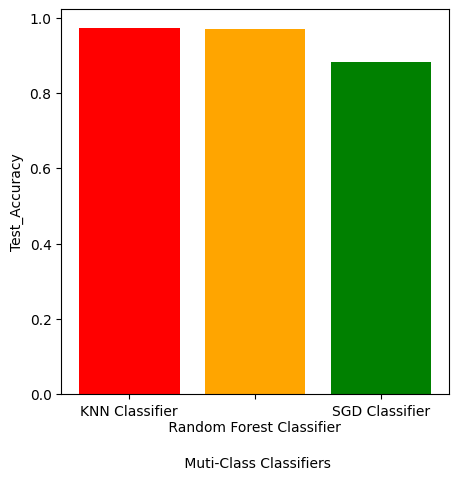

In [ ]:
import matplotlib.pyplot as plt

models = ['KNN Classifier', '\n Random Forest Classifier ', 'SGD Classifier']
Test_Accuracy = [0.9730639730639731, 0.9690847872666054, 0.882563003775125]
colors = ['red', 'orange', 'green', 'blue' ]

plt.figure(figsize=(5, 5))
plt.bar(models, Test_Accuracy, color=colors)

plt.ylabel('Test_Accuracy')
plt.xlabel('\n Muti-Class Classifiers')
plt.title('')
plt.show()